In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
#print the first 5 lines
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#print the last 5 lines
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [4]:
#summarize the data
df.describe().T.style.set_properties(**{'background-color': 'greyblack','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [5]:
#check to not have an abnormal value
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [6]:
#clean the data
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)


In [7]:
print(df)

        HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0                  0  16.60        1                0       0             3.0   
1                  0  20.34        0                0       1             0.0   
2                  0  26.58        1                0       0            20.0   
3                  0  24.21        0                0       0             0.0   
4                  0  23.71        0                0       0            28.0   
...              ...    ...      ...              ...     ...             ...   
319790             1  27.41        1                0       0             7.0   
319791             0  29.84        1                0       0             0.0   
319792             0  24.24        0                0       0             0.0   
319793             0  32.81        0                0       0             0.0   
319794             0  46.56        0                0       0             0.0   

        MentalHealth  DiffW

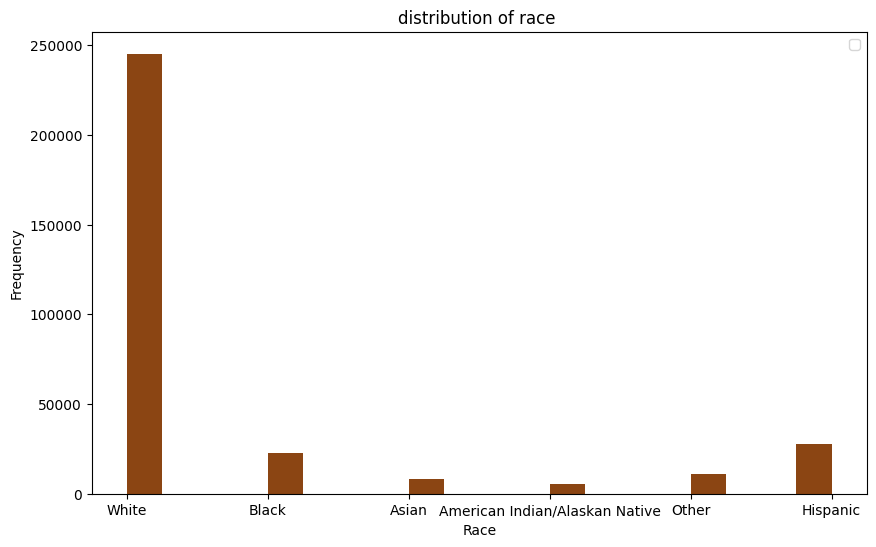

In [8]:
#visualisation of the distribution of gender
plt.figure(figsize=(10, 6))
plt.hist(df['Race'], bins=20,color='saddlebrown')
plt.title('distribution of race ')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.legend()
plt.show()

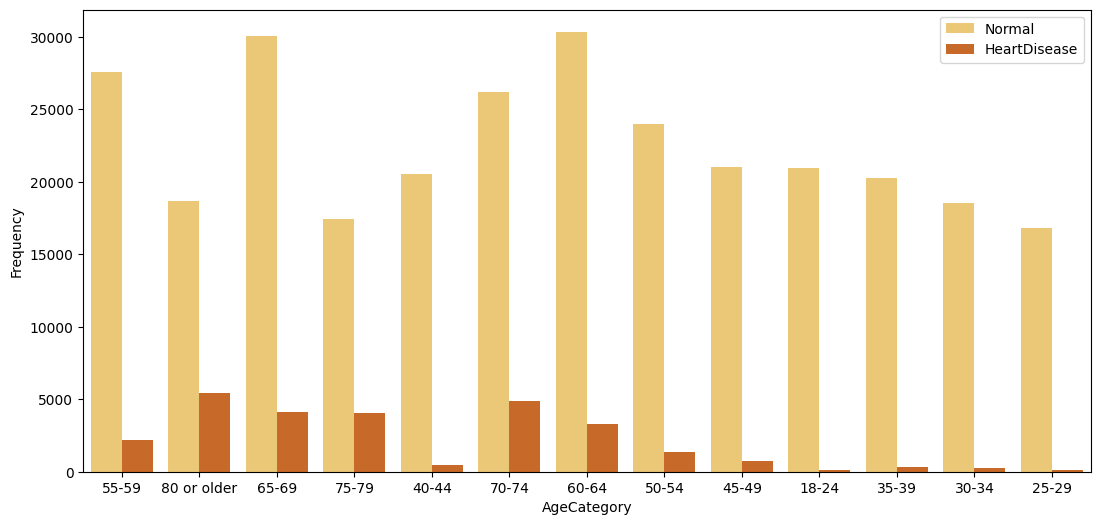

In [9]:
#visualisation to compare between a normal peson and the on with heart disease according to the age
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

In [10]:
#split the data into testing and traning
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 17)
Shape of testing feature: (63959, 17)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [11]:
#encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Create a transformer
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough'
)

# Encode training data
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names_out())
transformed_train_data=transformed_train_data.fillna(0)
# Concatenate the two tables
X_train = pd.concat([transformed_train_data, X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis=1)], axis=1)
X_train=X_train.fillna(0)
# Encode test data
transformed_test = transformer.transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names_out())
transformed_test_data=transformed_test_data.fillna(0)
# Concatenate the two tables
X_test = pd.concat([transformed_test_data, X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis=1)], axis=1)
X_test=X_test.fillna(0)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Scale training data
X_train = scaler.fit_transform(X_train)

# Scale test data using the parameters from the training data
X_test = scaler.transform(X_test)


In [13]:
#modelling
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    acc_final=print(f"accurancy:{acc}")
    prec_final=print(f"precision:{prec}")
    rec_final=print(f"recall:{rec}")
    cm_final=print(f"confusion matrix:{cm}")

    return(acc_final,prec_final,rec_final,cm_final)

In [14]:
#train the model
X_train

array([[-0.24099095, -0.21505686, -0.22736615, ...,  2.82382823,
        -0.17758527,  3.43623392],
       [-0.24099095, -0.21505686, -0.22736615, ..., -0.35412919,
        -0.17758527, -0.29101628],
       [-0.24099095, -0.21505686, -0.22736615, ...,  2.82382823,
        -0.17758527, -0.29101628],
       ...,
       [-0.24099095, -0.21505686, -0.22736615, ..., -0.35412919,
        -0.17758527, -0.29101628],
       [-0.24099095, -0.21505686, -0.22736615, ..., -0.35412919,
        -0.17758527, -0.29101628],
       [-0.24099095, -0.21505686, -0.22736615, ..., -0.35412919,
        -0.17758527, -0.29101628]])

In [15]:

#KNeighborsClassifier is a supervised learning algorithm in machine learning used for classification tasks.
#It works by classifying a new data point based on the class of its nearest neighbors in the training data.
# Building a model using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Assuming X_train, y_train, X_test, y_test are defined

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
#=X_train.fillna(0)
#y_train=y_train.fillna(0)
X_train = X_train[:len(y_train)]
knn.fit(X_train, y_train)

def evaluate_model(model, x_test, y_test):
    x_test = x_test[:len(y_test)]
    print(len(x_test))
    print(len(y_test))
    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, and confusion matrix
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec,'cm': cm}

# Evaluate model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('Confusion Matrix:\n', knn_eval['cm'])

63959
63959
Accuracy: 0.9059710126799981
Precision: 0.3637236084452975
Recall: 0.13918472273228058
Confusion Matrix:
 [[57187  1326]
 [ 4688   758]]


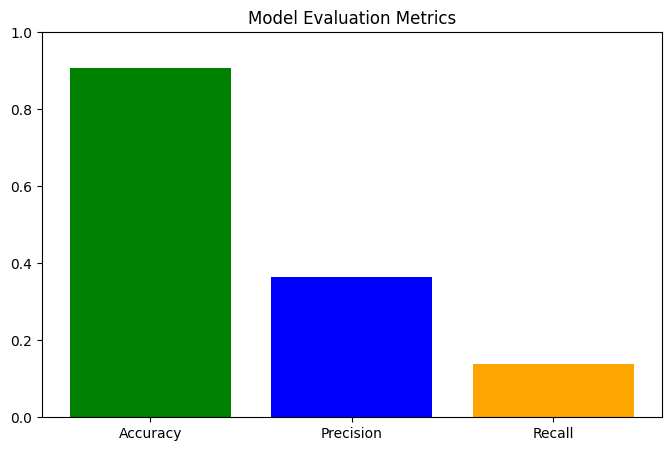

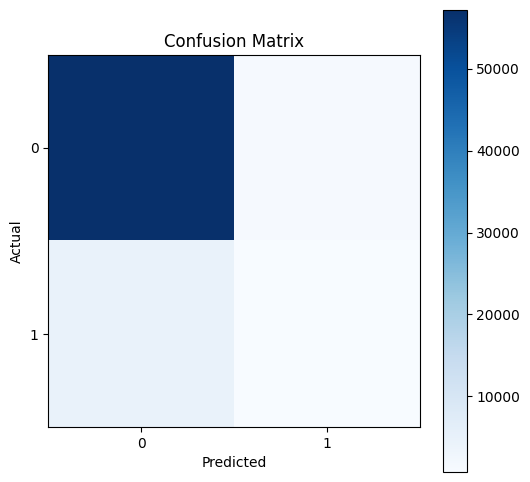

In [16]:
#visualisation of the result
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming knn_eval is defined (output from the evaluation function)

# Extract metrics
acc = knn_eval['acc']
prec = knn_eval['prec']
rec = knn_eval['rec']
cm = knn_eval['cm']

# Plotting
labels = ['Accuracy', 'Precision', 'Recall']
values = [acc, prec, rec]

# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'blue', 'orange'])
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)  # Set y-axis limit to represent percentages (0-100%)
plt.show()

# Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['0', '1']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
